In [62]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout, BatchNormalization
# define model
model = Sequential()
model.add(
    Conv2D(
        64, (3, 3),
        input_shape=(50,50, 3),
        activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(units=4,activation='softmax'))
# show the model structure
model.summary()
model.layers[1].name


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 50, 50, 64)        1792      
                                                                 
 conv2d_55 (Conv2D)          (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 conv2d_57 (Conv2D)          (None, 25, 25, 128)       147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                 

'conv2d_55'

In [42]:
# Visualization
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot

(3, 3, 3, 64)
(3, 3, 64, 64)
(3, 3, 64, 128)
(3, 3, 128, 128)
(3, 3, 128, 256)
(3, 3, 256, 256)


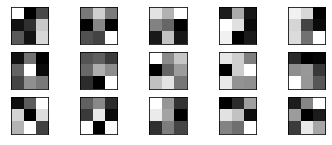

In [67]:

print(model.layers[0].get_weights()[0].shape)
print(model.layers[1].get_weights()[0].shape)
print(model.layers[3].get_weights()[0].shape)
print(model.layers[4].get_weights()[0].shape)
print(model.layers[6].get_weights()[0].shape)
print(model.layers[7].get_weights()[0].shape)

def Visualize(layer_no=1, n_filters=6):
    # retrieve weights from the second hidden layer
    filters, biases = model.layers[layer_no].get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    # plot first few filters
    ix = 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = pyplot.subplot(n_filters, 5, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()
Visualize(1,5)

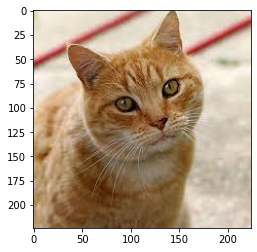

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


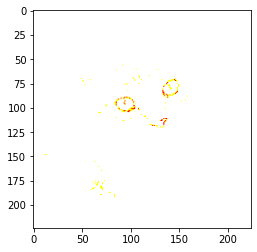

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


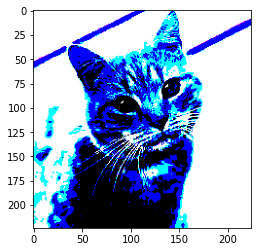

2022-05-12 16:18:42.209858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


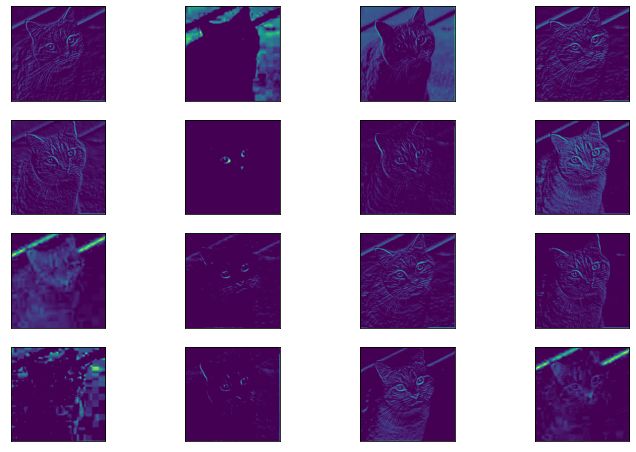

In [99]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the image with the required shape
img = load_img('../images/imageProgess/cat.jpg', target_size=(224, 224))
pyplot.imshow(img)
pyplot.show()

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
pyplot.imshow(img[0])
pyplot.show()

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img) # ???
pyplot.imshow(img[0])
pyplot.show()


# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
# get feature map for first hidden layer
feature_maps = model.predict(img)


# plot all 64 maps in an 8x8 squares
square = 4
ix = 1
pyplot.figure(figsize=(12,8))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()